# Exploratory Data Analysis with Rotten Tomatoes Data

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Introduction

Rotten Tomatoes gathers movie reviews from critics. An [entry on the website](http://www.rottentomatoes.com/m/primer/reviews/?type=top_critics) typically consists of a short quote, a link to the full review, and a Fresh/Rotten classification which summarizes whether the critic liked/disliked the movie.


When critics give quantitative ratings (say 3/4 stars, Thumbs up, etc.), determining the Fresh/Rotten classification is easy. However, publications like the New York Times don't assign numerical ratings to movies, and thus the Fresh/Rotten classification must be inferred from the text of the review itself.

## The Data

You will be starting with a database of Movies, derived from the MovieLens dataset. This dataset includes information for about 10,000 movies, including the IMDB id for each movie.

In [2]:
# pull in data
critics = pd.read_csv('../data/critics.csv')

#let's drop rows with missing quotes
critics = critics[~critics.quote.isnull()]

In [3]:
critics.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
1,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
2,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
3,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
4,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
5,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


In [4]:
critics.fresh.unique()

array(['fresh', 'rotten', 'none'], dtype=object)

## Exploratory Data Analysis

#### How many reviews, critics, and movies are there in this data set?

In [5]:
number_reviews = len(critics) 
number_critics = len(critics.critic.unique())
number_movies = len(critics.rtid.unique())

print "Number of reviews: %i" % number_reviews
print "Number of critics: %i" % number_critics
print "Number of movies:  %i" % number_movies

Number of reviews: 15624
Number of critics: 623
Number of movies:  1930


#### What is the shape of the data set?

In [6]:
critics.shape

(15624, 8)

#### List the 5 publications with the most reviews. hint: use `.goupby()` and `.count()`

In [7]:
publication = critics.groupby(['publication']).critic.count()
publication.sort(ascending=False)
publication.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


publication
New York Times       1333
Variety              1137
Washington Post      1122
Chicago Sun-Times    1086
Chicago Reader        922
Name: critic, dtype: int64

#### List the 5 critics with the most reviews, along with the publication they write for hint: use `.goupby()` and `.count()`

In [8]:
critic_publication = critics.groupby(['critic', 'publication']).critic.count()
critic_publication.sort(ascending=False)
critic_publication.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


critic              publication      
Roger Ebert         Chicago Sun-Times    1078
James Berardinelli  ReelViews             807
Janet Maslin        New York Times        518
Variety Staff       Variety               434
Jonathan Rosenbaum  Chicago Reader        413
Name: critic, dtype: int64

#### Create a column 'fresh_binary' based on the 'fresh' column. If the value is 'fresh', give me 1, otherwise 0.

In [9]:
critics['fresh_binary'] = np.where(critics['fresh'] == 'fresh',1,0)

#### Plot the "fresh" rating proportions as a function of year. Comment on the result -- is there a trend? What do you think it means? FYI-- you must createa a 'year' column

In [10]:
# create year column
critics['year'] = critics['review_date'].str[:4].astype(int)

critic_year_fresh = critics.groupby(['year'],as_index=False).fresh_binary.mean()
critic_year_fresh.head()

,year,fresh_binary
0,1800,1.0
1,1929,0.0
2,1930,1.0
3,1932,1.0
4,1933,1.0


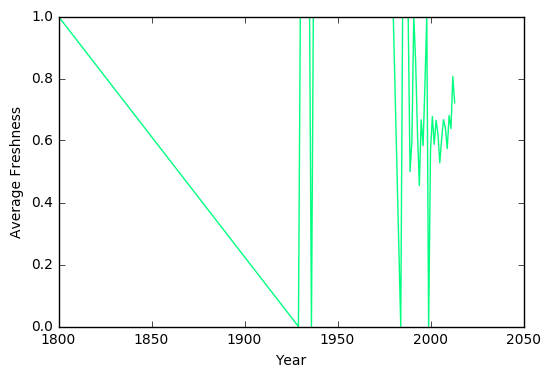

In [11]:
plt.plot(critic_year_fresh.year, critic_year_fresh.fresh_binary, color='#00FF7F')
plt.xlabel('Year')
plt.ylabel('Average Freshness')

# this looks bizarre... let's zoom into 20 years out

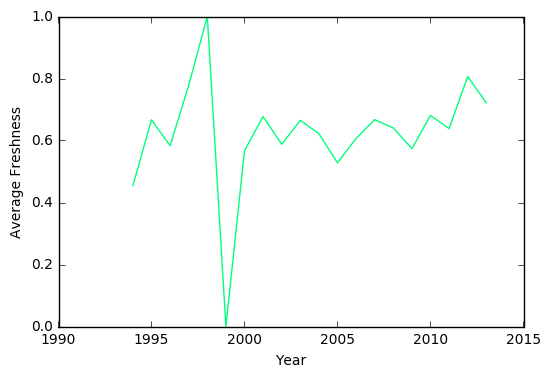

In [12]:
# see only past 20 years
critic_year_fresh = critics.groupby(['year'],as_index=False).fresh_binary.mean().iloc[-20:]

plt.plot(critic_year_fresh.year, critic_year_fresh.fresh_binary, color='#00FF7F')
plt.xlabel('Year')
plt.ylabel('Average Freshness')

# what happened in 1999?!

## Next Steps
You could look into text data analysis using the `sklearn`, `nltk`, or `spacy` packages. Transform the critic review text into data to be used in a random forest model. Train a random forest model with your transformed data and run cross validation to see what the model fit is like. Then, you can identify the most important features in your model. Interested in doing so but not sure how to start? Email anahita at *abahri@bu.edu*.